# Mount Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# User Guide


Hello</br>
In order to run the model and to train it from scratch all you need to do is follow the section one by one.

# Downloading Databases

## Blog Database


In order to download the Blog database visit this link:
*https://www.kaggle.com/datasets/rtatman/blog-authorship-corpus*
and download the file **"blogtext.csv"**
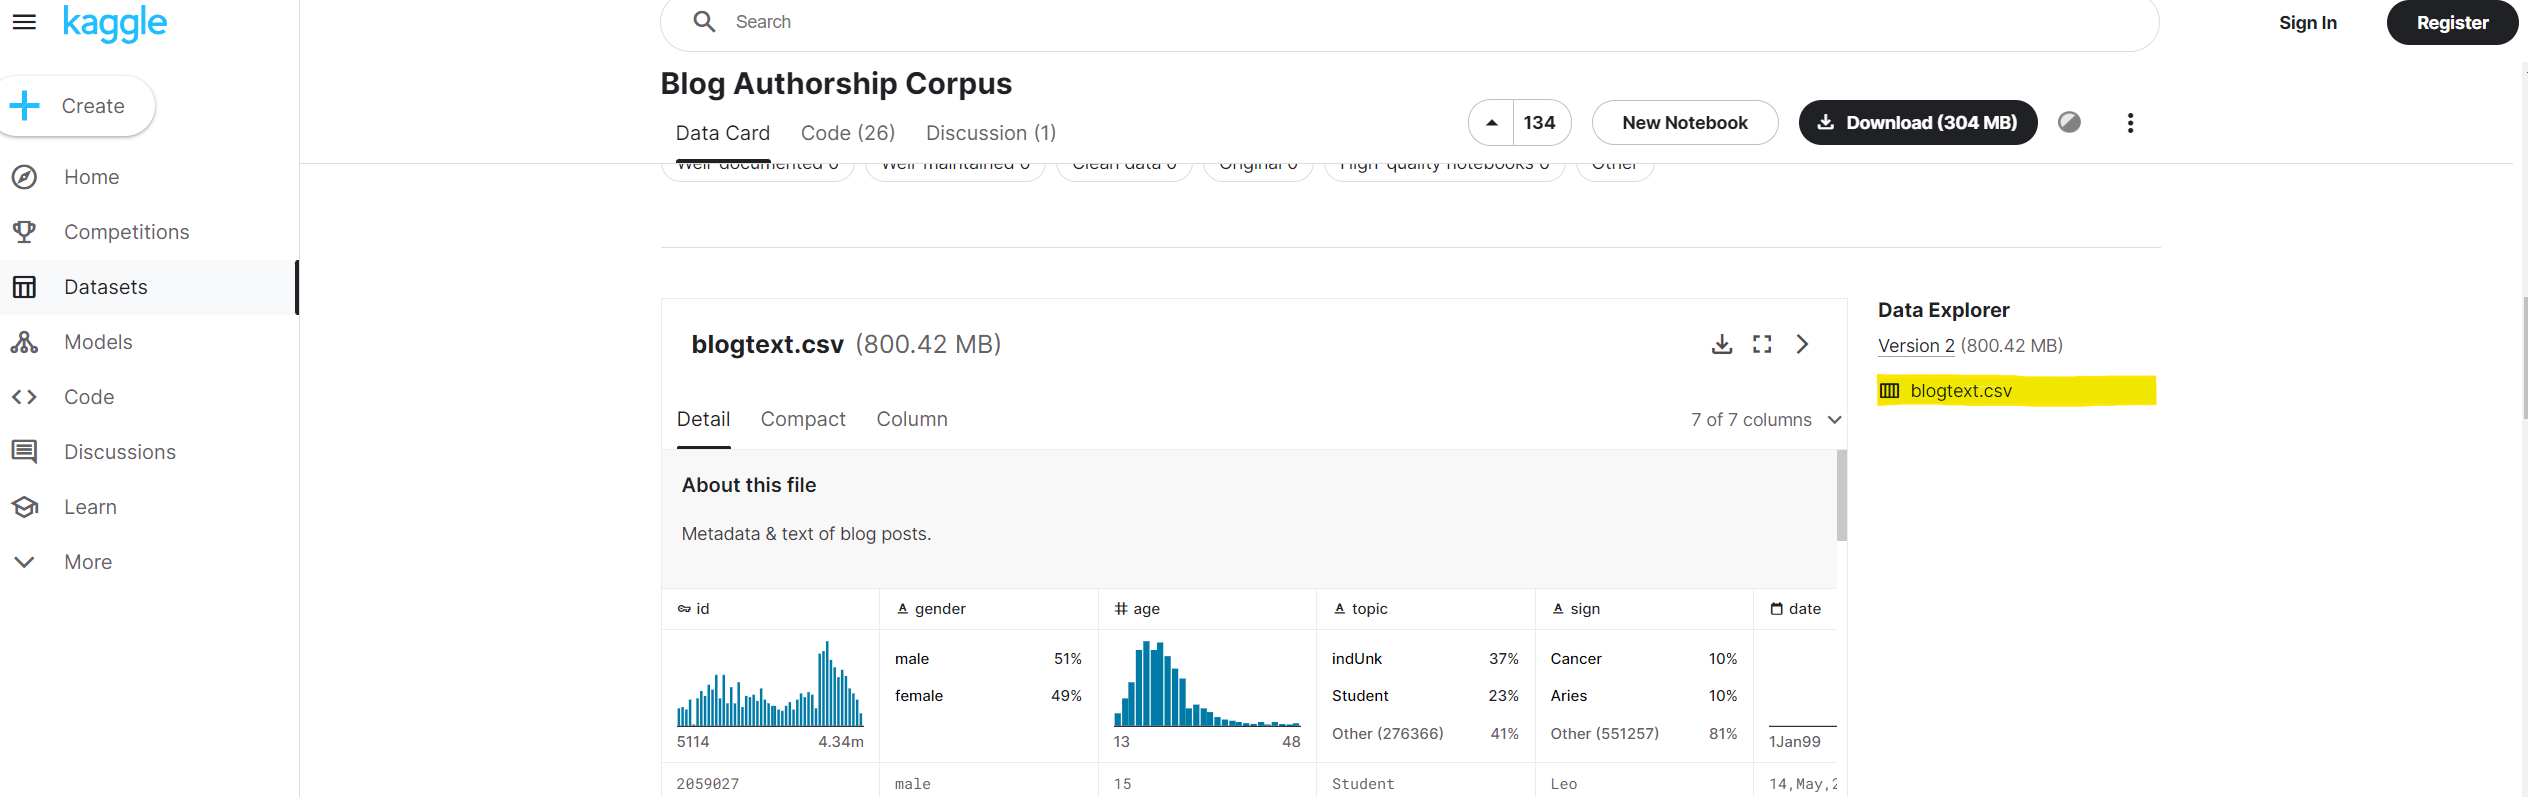

## Gutenberg Database

In order to download the Gutenberg data base we need to clone the repository of the Gutenberg in the GitHub.</br>
The download should take sometime so be patient. **Recomonded** to download it in your pc environment and not at the Google Colab enviroment. In order to save the database directly into your pc.


In [ ]:
#Clone this repository
!git clone https://github.com/pgcorpus/gutenberg.git


In [ ]:
#Enter the Gutenberg directory
%cd gutenberg

In [ ]:
#The requirements file has all the libraries that needed to be download in order deal with the Gutenberg project.
!pip install -r requirements.txt


The next line of code will download a copy of all UTF-8 books in PG and will create a csv file with metadata (e.g. author, title, year, ...).

Notice that if you already have some of the data, the program will only download those you are missing (we use rsync for this). It is hence easy to update the dataset periodically to keep it up-to-date by just running get_data.py.

In [ ]:
!python get_data.py

To process all the data in the raw/ directory, run this next line of code.
This will fill in the text/, tokens/ and counts/ folders.

In [ ]:
!python process_data.py

## Shakespeare and Imposters datasets


To download those Shaekspeare and the imposters datasets you need to go to the github link of our project
https://github.com/TuvalZit/Capstone-Project-23-1-R-18.git
and to download them from it.</br>
Each data sets has it own directory. Shakespeare folder contains only texts files and the imposters folder consist of many authors folders that each one of the author folder has several texts inside it.

# Gather data

## Blogs

Read and make little adjustments to Blog database.

In [ ]:
import pandas as pd
import os

#read blogtext.csv from the blogtext.csv directory

blogtextPath=".../blogtext.csv"   #Update the path!
blog_data = pd.read_csv(blogtextPath)

#replace unique id values with "blog_n" where n is a number beggining at 0
n_values = len(blog_data.id.unique())
author_mapping = {k: v for k, v in zip(blog_data.id.unique(), range(n_values))}

blog_data['id'] = blog_data['id'].apply(lambda x: 'blog_' + str(author_mapping[x]))

#Check if reading proccess was successeed
blog_data

## Books

Cleaning the metadata files.
This file consist of list of all available texts of project Gutenberg.
There is a chance that not all texts files have been downloaded, therefore we need to update the metadata with the list of texts you have.

In [ ]:
#path to Gutenberg metadata
metadata_path=".../gutenberg/metadata/metadata.csv" #Update the path!
#path to Gutenberg texts
texts_path=".../gutenberg/data/text/text" #Update the path!

meta = pd.read_csv(metadata_path)

available_texts = list(os.listdir(texts_path))

clean_meta = meta[~meta.author.isin({'Anonymous', 'Various'})]
clean_meta = clean_meta[clean_meta.language.apply(lambda x: 'en' in x)]
clean_meta = clean_meta[clean_meta.id.apply(lambda x: f'{x}_text.txt' in available_texts)]
#Check if cleaning metadata proccess was successeed
clean_meta

Creating Dataframe for each of the text you read.

In [ ]:
books = []
for text_id in clean_meta.id:
    filename = f'data/nlp/gutenberg/data/text/{text_id}_text.txt'
    print(f'Reading {filename}')
    with open(filename, 'r') as f:
        text = f.read()
        books.append(pd.DataFrame({'text': [text], 'id': [text_id]}))

book_data = pd.concat(books)

Creating the last file that from it the book csv will be created.

In [ ]:
book_data_meta = book_data.merge(clean_meta, on=['id']).drop('type', axis=1).dropna()
n_values = len(book_data_meta.author.unique())
book_mapping = {k: v for k, v in zip(book_data_meta.author.unique(), range(n_values))}

book_data_meta['id_2'] = book_data_meta.author.apply(lambda x: 'book_' + str(book_mapping[x]))
book_data_meta
#Checking the process
all([x in book_data_meta.author.unique() for x in book_mapping.keys()])

## Shakespeare

In [ ]:
import os
import glob
import pandas as pd
import re

# Specify the path to the main folder
main_folder = '/content/drive/MyDrive/DataBase/shakespeare'

# Initialize lists to store the data
data = []
columns = ['Author', 'Title', 'Text']
# Iterate over the text files within shakespeare folder
for text_file in glob.glob(os.path.join(main_folder,'*.txt')):
    file_name = os.path.splitext(os.path.basename(text_file))[0]
    file_name = re.sub(r'by shakespeare', '', file_name, flags=re.IGNORECASE)
    with open(text_file, 'r', encoding='utf-8', errors='ignore') as file:
        lines = file.readlines()
        title = file_name
        text = ' '.join(lines[1:]).replace('\n', ' ')
        data.append(["Shakespeare", title, text])


# Create a pandas DataFrame from the data
shakespeare_data = pd.DataFrame(data,columns=columns)

# # # Print the resulting dataset
shakespeare_data

## Imposters


In [ ]:
import os
import glob
import pandas as pd

# Specify the path to the main folder
main_folder = '/content/drive/MyDrive/DataBase/imposters'

# Initialize lists to store the data
data = []#
columns = ['Author', 'Title', 'Text']

# Iterate over the author folders
for author_folder in glob.glob(os.path.join(main_folder, '*')):
    author = os.path.basename(author_folder)
    # Iterate over the text files within each author folder
    for text_file in glob.glob(os.path.join(author_folder, '*.txt')):
        file_name = os.path.splitext(os.path.basename(text_file))[0]
        with open(text_file, 'r', encoding='utf-8', errors='ignore') as file:
            lines = file.readlines()
            title = file_name
            text = ' '.join(lines[1:]).replace('\n', ' ')
            data.append([author, title, text])

# Create a pandas DataFrame from the data
imposters_data = pd.DataFrame(data, columns=columns)

# Print the resulting dataset
imposters_data

## Creating CSV Files for all

Saving all modified databases to csv files.


In [ ]:
#path to save the blog csv
blog_as_csv_path = ".../blog_as_csv"  #update the path where you want to save the blog csv.
#path to save the book csv
book_as_csv_path = ".../books_as_csv"  #update the path where you want to save the book csv.
#path to save the Shakespeare csv
shakespeare_as_csv_path = ".../shakespeare_as_csv"  #update the path where you want to save the shakespeare_as_csv csv.
#path to save the imposter csv
imposter_as_csv_path = ".../imposters_as_csv"  #update the path where you want to save the imposter csv.

blog_data.to_csv(blog_as_csv_path, index=False)
book_data_meta.to_csv(book_as_csv_path, index=False)
shakespeare_data.to_csv(shakespeare_as_csv_path,index=False)
imposters_data.to_csv(imposter_as_csv_path,index=False)

# Clean Data


## Common Functions

In [ ]:
!pip install transformers
!pip install pandas
!pip install multiprocessing
!pip install tqdm

Defining Utilities Function to the clean data process.

In [ ]:
import pandas as pd

CHUNK_SIZE = 512

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("roberta-large")

from multiprocessing import Pool
from tqdm.notebook import tqdm

def split_data(row):
    eid, values = row
    input_ids = tokenizer(values.text).input_ids
    chunked = [input_ids[chunk: chunk + CHUNK_SIZE] for chunk in range(0, len(input_ids), CHUNK_SIZE)]
    decoded_chunked = tokenizer.batch_decode(chunked)
    return pd.DataFrame({'id': [eid]*len(chunked),
                         'pretokenized_text': chunked,
                         'decoded_text': decoded_chunked})

def build_chunk_dataframe_gutenberg_blog(text_data, metadata=None, cores=10):
    with Pool(cores) as p:
        chunks = list(tqdm(p.imap_unordered(split_data, text_data.iterrows()),
                            total=len(text_data)))

    if metadata is not None:
        return pd.concat(chunks).merge(metadata, on='id')
    else:
        return pd.concat(chunks)

def build_chunk_dataframe_shakespeare_imposter(text_data, metadata=None, cores=10):
    with Pool(cores) as p:
        chunks = list(tqdm(p.imap_unordered(split_data, text_data.iterrows()),
                            total=len(text_data)))

    if metadata is not None:
        return pd.concat(chunks).merge(metadata,left_on='id', right_index=True)
    else:
        return pd.concat(chunks)

def clean_non_unique(data):
    nunique_ids = (data.id.value_counts() > 1)
    nunique_ids = nunique_ids[nunique_ids].index
    return data[data.id.isin(nunique_ids)]

## Pre-processing Blogs

In [ ]:
#Pre-Adjustment before creating chunk dataframes
blog_as_csv_path = ".../blog_as_csv.csv" #Update the path
print('Load data blog_as_csv.csv')
blog_corpus = pd.read_csv(blog_as_csv_path)
blog_corpus.text = blog_corpus.text.apply(lambda x: x.strip())
clean_blog_corpus = blog_corpus[['id', 'text']].groupby("id").agg(lambda x: '<\s>'.join(x))
meta_blog_corpus = blog_corpus[['id', 'age', 'topic', 'gender']].groupby("id").agg(lambda x: list(x)[0])
full_blog_corpus = meta_blog_corpus.merge(clean_blog_corpus, on='id')
full_blog_corpus

In [ ]:
#Creating chung dataframes
chunked_blog_data = build_chunk_dataframe_gutenberg_blog(full_blog_corpus, meta_blog_corpus)
nunique_blog_data = clean_non_unique(chunked_blog_data)
#Checking processing
nunique_blog_data

In [ ]:
#Path to save the blog preprocess csv file
blog_preprocessed_path=".../blog_as_csv_preprocessed.csv"#Update path
nunique_blog_data.to_csv(blog_preprocessed_path, index=False)

## Pre-processing Books

In [ ]:
#Pre-Adjustment before creating chunk dataframes
book_as_csv_path = ".../books_as_csv"#Update path
print('Load data book_as_csv.csv')
book_corpus = pd.read_csv(book_as_csv_path)
book_corpus

In [ ]:
import re
def clean_text(text):
    return re.sub(r'\n\n+', '\n', text)[512:]

book_corpus['clean_text'] = book_corpus.text.apply(clean_text)

In [ ]:
book_corpus.columns = ['old_text', 'id', 'title', 'author', 'authoryearofbirth',
                        'authoryearofdeath', 'language', 'downloads', 'subjects', 'id_2',
                        'text']
book_corpus.text = book_corpus.text.apply(lambda x: x.strip())
clean_book_corpus = book_corpus[['id', 'text']].groupby("id").agg(lambda x: '<\s>'.join(x))

chunked_book_data = build_chunk_dataframe_gutenberg_blog(clean_book_corpus, book_corpus.drop(['old_text', 'text'], axis=1))
nunique_book_data = clean_non_unique(chunked_book_data)
nunique_book_data

In [ ]:
#Path to save the blog preprocess csv file
books_preprocessed_path=".../book_as_csv_preprocessed.csv"#update path
nunique_book_data.to_csv(books_preprocessed_path, index=False)

## Pre-processing Shakespeare

In [ ]:
#Pre-Adjustment before creating chunk dataframes
shakespeare_as_csv_path = ".../shakespeare_as_csv"  #update the path
shake_corpus = pd.read_csv(shakespeare_as_csv_path)
import re
def clean_text(text):
    return re.sub(r'\n\n+', '\n', text)[512:]

shake_corpus['clean_text'] = shake_corpus.Text.apply(clean_text)
#Check reading process
shake_corpus

In [ ]:
shake_corpus.columns = ['Author','Title','old_text','text']
shake_corpus.text = shake_corpus.text.apply(lambda x: x.strip())

In [ ]:
chunked_shakespeare_data = build_chunk_dataframe_shakespeare_imposter(shake_corpus, shake_corpus.drop(['old_text', 'text'], axis=1))
nunique_shakespeare_data = clean_non_unique(chunked_shakespeare_data)
nunique_shakespeare_data

In [ ]:
shakespeare_preprocessed_path=".../shakespeare_as_csv_preprocessed.csv"#Update Path
nunique_shakespeare_data.to_csv("/content/drive/MyDrive/DataBase/shakespeare_as_csv_preprocessed.csv", index=False)

## Pre-processing Imposters

In [ ]:
imposters_corpus = pd.read_csv("/content/drive/MyDrive/DataBase/imposters_data.csv")
import re
def clean_text(text):
    return re.sub(r'\n\n+', '\n', text)[512:]

imposters_corpus['clean_text'] = imposters_corpus.Text.apply(clean_text)

In [ ]:
imposters_corpus

In [ ]:
imposters_corpus.columns = ['Author','Title','old_text','text']
imposters_corpus.text = imposters_corpus.text.apply(lambda x: x.strip())

In [ ]:
chunked_imposters_data = build_chunk_dataframe_shakespeare_imposter(imposters_corpus, imposters_corpus.drop(['old_text', 'text'], axis=1))
nunique_imposters_data = clean_non_unique(chunked_imposters_data)
nunique_imposters_data

In [ ]:
imposters_preprocessed_path=".../imposters_as_csv_preprocessed.csv"#Update Path
nunique_imposters_data.to_csv(imposters_preprocessed_path, index=False)

# Train-Test-Split


## Common

In [ ]:
#split datasets in local_data by id
import pandas as pd
import numpy as np

def train_test_split_by_author(df, test_size=0.1, random_state=42):
    unique_authors = df.id.unique()
    test_authors = len(unique_authors) * test_size
    in_test = np.random.choice(unique_authors, int(test_authors), replace=False)

    return df[~df.id.isin(in_test)], df[df.id.isin(in_test)]

def train_test_split_by_title(df,test_size=0.1,random_state=42):
    unique_titles = df.Title.unique()
    test_titles = len(unique_titles) * test_size
    in_test = np.random.choice(unique_titles, int(test_titles), replace=False)

    return df[~df.Title.isin(in_test)], df[df.Title.isin(in_test)]


## Blogs

In [ ]:
import pandas as pd
blog_path=".../blog_as_csv_preprocessed"#update path
blog_data = pd.read_csv(blog_path)
blog_train, blog_test = train_test_split_by_author(blog_data)
blog_train.to_csv("local_data/blog_train.csv", index=False)
blog_test.to_csv("local_data/blog_test.csv", index=False)

## Books

In [ ]:
import pandas as pd
book_path=".../book_as_csv_preprocessed.csv"#update path
book_data = pd.read_csv(book_path)
book_data['old_id'] = book_data.id
book_data['id'] = book_data.id_2
del book_data['id_2']
book_train, book_test = train_test_split_by_author(book_data)
book_train.to_csv("local_data/book_train.csv", index=False)
book_test.to_csv("local_data/book_test.csv", index=False)

## Shakespeare


In [ ]:
import pandas as pd
shakespeare_path="/content/drive/MyDrive/Project/shakespeare_as_csv_preprocessed.csv"#update path
shakespeare_data = pd.read_csv(shakespeare_path)
shakespeare_data_train, shakespeare_data_test = train_test_split_by_title(shakespeare_data)
shakespeare_data_train.to_csv("/content/drive/MyDrive/Project/shakespeare_train.csv", index=False)
shakespeare_data_test.to_csv("/content/drive/MyDrive/Project/shakespeare_test.csv", index=False)

## Imposters

In [ ]:
import pandas as pd
imposters_path="/content/drive/MyDrive/Project/imposters_as_csv_preprocessed.csv"#update path
imposters_data = pd.read_csv(imposters_path)
imposters_train, imposters_test = train_test_split_by_author(imposters_data)
imposters_train.to_csv("/content/drive/MyDrive/Project/imposters_train.csv", index=False)
imposters_test.to_csv("/content/drive/MyDrive/Project/imposters_test.csv", index=False)

## Gather the finalize datasets

In [ ]:
datasets = {'blog_train': blog_train,
            'blog_test': blog_test,
            'book_train': book_train,
            'book_test': book_test,
            'shakespeare_train':shakespeare_data_train,
            'shakespeare_test':shakespeare_data_test,
            'imposters_train':imposters_train,
            'imposters_test':imposters_test,
            }

{print(f'{key}: {len(value.id.unique())}')for key, value in datasets.items()}

# Train the model

Install Libraries

In [ ]:
!pip install wandb
!pip install transformers
!pip install datetime
!pip install pytorch_lightning
!pip install tqdm
!pip install pandas
!pip install numpy
!pip install tensorflow

Make sure you download the python files from the GitHub in order to run the experminet: https://github.com/TuvalZit/Capstone-Project-23-1-R-18/tree/main/Python%20Files

In [ ]:
!python run_experiment.py  --model lstm --books --shake --imposters --batch_size 128 --vbatch_size 100 --scheduler enable

# Show Figures

In [ ]:
#Utilities
from transformers import AutoTokenizer
import torch
import torch.nn.functional as F
from tqdm.auto import tqdm
from random import shuffle

TOKENIZER = AutoTokenizer.from_pretrained('roberta-large')

def embed(model, texts):
    tokenized_texts = TOKENIZER(texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
    embedding = model(tokenized_texts.input_ids.to(model.device),
                      tokenized_texts.attention_mask.to(model.device),
                      )
    return embedding

In [ ]:
import pandas as pd
test_books = pd.read_csv('/content/drive/MyDrive/Databases/book_test.csv')
test_shake = pd.read_csv('/content/drive/MyDrive/Databases/shakespeare_test.csv')
#train_shake = pd.read_csv('/content/drive/MyDrive/Databases/shakespeare_train.csv')
test_imposters = pd.read_csv('/content/drive/MyDrive/Databases/imposters_test.csv')
train_imposters = pd.read_csv('/content/drive/MyDrive/Databases/imposters_train.csv')

In [ ]:
test_shake.columns=['id','pretokenized_text','decoded_text','author','title']
#train_shake.columns=['id','pretokenized_text','decoded_text','author','title']
test_imposters.columns=['id','pretokenized_text','decoded_text','author','title']
train_imposters.columns=['id','pretokenized_text','decoded_text','author','title']

In [ ]:
model_zoo = {'all': '/content/drive/MyDrive/Project/model/final_2023-06-24_18-29-20_lstm_books+shake+imposters-v1.ckpt'}

data_zoo = {'all': test_books.append(test_shake).append(test_imposters).append(train_imposters)}

In [ ]:
!pip install pytorch_lightning

In [ ]:
from model import ContrastiveLSTMHead

DEVICE = 1
model = ContrastiveLSTMHead.load_from_checkpoint(checkpoint_path=model_zoo['all']).cuda()

In [ ]:
embeddings = []

for book_idx, book_df in tqdm(data_zoo['all'].groupby('title')):
    with torch.no_grad():
        batch = TOKENIZER(book_df.decoded_text.tolist(), return_tensors='pt', padding='max_length', max_length=512, truncation=True)
        embedding = model(batch.input_ids[:128].cuda(model.device), batch.attention_mask[:128].cuda(model.device)).mean(0)
        embeddings.append(embedding.cpu())

embeddings = torch.stack(embeddings, 0)

In [ ]:
import re

grouped_df = data_zoo['all'].groupby('title')
authors = grouped_df.apply(lambda x: x.iloc[0]).author.tolist()
books =  grouped_df.apply(lambda x: x.iloc[0]).index.tolist()
embedding_dataset = pd.DataFrame({'book': books, 'embedding': [embed for embed in embeddings.numpy()],  'author': authors})

In [ ]:
!pip install pickle-mixin

In [ ]:
import pickle
with open('/content/total_embedding.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(embedding_dataset, f, pickle.HIGHEST_PROTOCOL)
# The following example reads the resulting pickled data.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math

candidates = set(embedding_dataset.author.value_counts().index.tolist())
dup_dataset = embedding_dataset[embedding_dataset.author.isin(candidates)].groupby('author').apply(lambda x: x.iloc[:10])
dup_dataset

#G = nx.Graph(edges = [(1, 2, 1), (2, 3, 2), (3, 4, 1), (4, 5, 2)]
th = 0.9
cs = cosine_similarity(dup_dataset.embedding.tolist())
cs = (cs - th) / (1 - th)
cs[cs<0] = 0
cs *= np.tri(*cs.shape)
np.fill_diagonal(cs, 0)

col_row = dup_dataset.author.tolist()
G = nx.to_networkx_graph(cs**2)
G = nx.relabel_nodes(G, {k: f'{k}_{v}' for k, v in zip(range(len(col_row)),col_row)})
edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())

plt.figure(figsize=(15,6))
pos = nx.spring_layout(G, k=0.7, iterations=70)
#pos = nx.spectral_layout(G, scale=1e-5)
nx.draw(G, pos, node_size=300, node_color = 'lightgrey', edge_color=weights,
        width=3*np.array(weights),
        with_labels=True,
        edge_cmap=plt.cm.Blues)
#nx.draw_networkx_edge_labels(G, pos)
#plt.show()
plt.savefig("/content/figures/cosinDiff_graph.pdf", dpi=1000)